!pip install yfinance
!pip install 

In [97]:
import yfinance as yf

In [91]:
print(yf.version)

<module 'yfinance.version' from '/Users/emily/miniconda3/lib/python3.8/site-packages/yfinance/version.py'>


In [1]:
#import yahoo_fin.stock_info as si
#import yf.info as si
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from io import BytesIO

with open("companies.txt") as file:
    lines = file.readlines()
    companyList = [line.rstrip() for line in lines]

stockData = {}

# writer = pd.ExcelWriter('/path_to_save/output.xlsx')
sum_df=pd.DataFrame()

for ticker in companyList:
    try:
        stockData[ticker] = si.get_data(ticker, start_date="01/01/2010", end_date="01/03/2020", interval="1mo")
        sum_df = sum_df.append(stockData[ticker])
    except:
        continue

sum_df.to_excel("output.xlsx") 

FileNotFoundError: [Errno 2] No such file or directory: 'companies.txt'

# Data Import

In [2]:
# imports & formatting
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from   sklearn.model_selection import cross_val_score
from scipy import optimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

full_DS = pd.read_csv("sharpeDS.csv")
full_DS

,date,open,high,low,close,adjclose,volume,ticker,monthly_return,name,sector,month
0,2010-01-01,26.000362,27.247843,25.376621,25.400612,19.294617,259719884,ABT,NaN,Abbott Laboratories,Health Care,1
1,2010-02-01,25.482178,26.389000,25.271067,26.043545,19.927471,303364943,ABT,3.279954,Abbott Laboratories,Health Care,2
2,2010-03-01,26.086725,26.652889,25.050358,25.275864,19.340067,402914340,ABT,-2.947711,Abbott Laboratories,Health Care,3
3,2010-04-01,25.333441,25.549351,23.706919,24.546568,18.782045,361812837,ABT,-2.885313,Abbott Laboratories,Health Care,4
4,2010-05-01,24.685711,24.752882,21.715748,22.819288,17.607489,436325761,ABT,-6.253615,Abbott Laboratories,Health Care,5
...,...,...,...,...,...,...,...,...,...,...,...,...
58241,2019-12-01,314.589996,323.799988,307.130005,321.859985,311.367798,1285175800,SPY,2.402082,S&P 500,All,12
58242,2019-12-01,314.589996,323.799988,307.130005,321.859985,311.367798,1285175800,SPY,2.402082,S&P 500,All,12
58243,2020-01-01,323.540009,332.950012,320.359985,321.730011,312.772308,1392003800,SPY,0.451078,S&P 500,All,1
58244,2020-01-01,323.540009,332.950012,320.359985,321.730011,312.772308,1392003800,SPY,0.451078,S&P 500,All,1


In [3]:
type(full_DS['date'][0])

str

In [4]:
round(full_DS.describe(),3)

,open,high,low,close,adjclose,volume,monthly_return,month
count,58246.000,58246.000,58246.000,58246.000,58246.000,5.824600e+04,57743.000,58246.000
mean,80.668,85.371,76.578,81.427,74.622,1.300829e+08,1.506,6.465
std,132.960,141.309,126.632,134.734,134.364,4.540038e+08,7.733,3.474
min,0.760,0.920,0.650,0.760,0.760,0.000000e+00,-67.405,1.000
25%,32.140,34.170,30.390,32.410,27.120,2.379628e+07,-2.750,3.000
50%,53.440,56.450,50.640,53.820,46.878,4.823550e+07,1.527,6.000
75%,88.497,93.260,84.370,89.328,80.770,1.053325e+08,5.606,9.000
max,3777.000,4058.000,3696.540,3816.970,3816.970,1.808265e+10,190.419,12.000


Text(0, 0.5, 'Monthly Return')

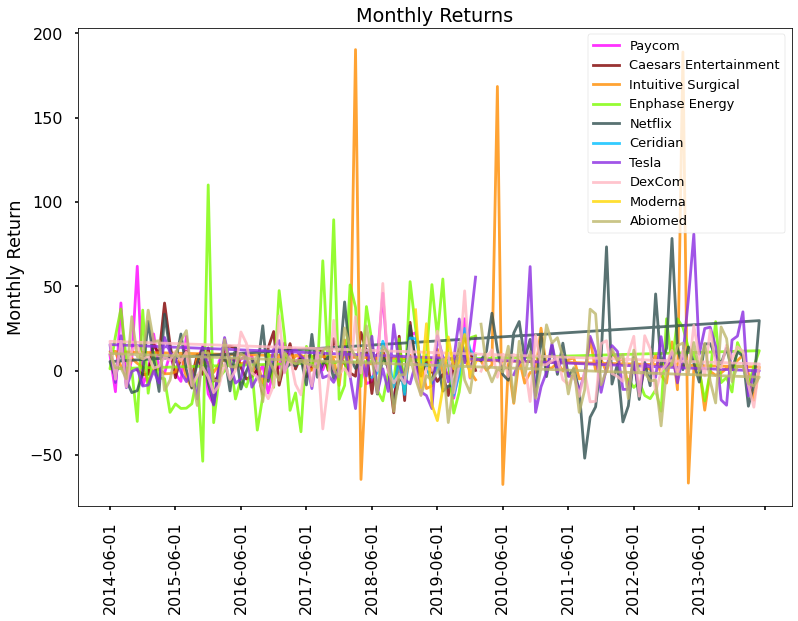

In [5]:
# Data Viz - Select time series for top performers, Plot time series for top performers - Cindy
full_DS = full_DS.dropna()
avg_monthly_returns = full_DS.groupby('name')['monthly_return'].agg(np.mean)
top10 = avg_monthly_returns.nlargest(n=10)

#plot top10asdf
top10
colorList = colorList=["fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki"]
i=0
for comp in (top10.index.values):
  plt.plot(full_DS[full_DS['name'] == comp].date, full_DS[full_DS['name'] == comp].monthly_return, label = comp, alpha=.8, color=colorList[i])
  i += 1

plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 132, 12),rotation=90)
plt.title('Monthly Returns')
plt.ylabel('Monthly Return')

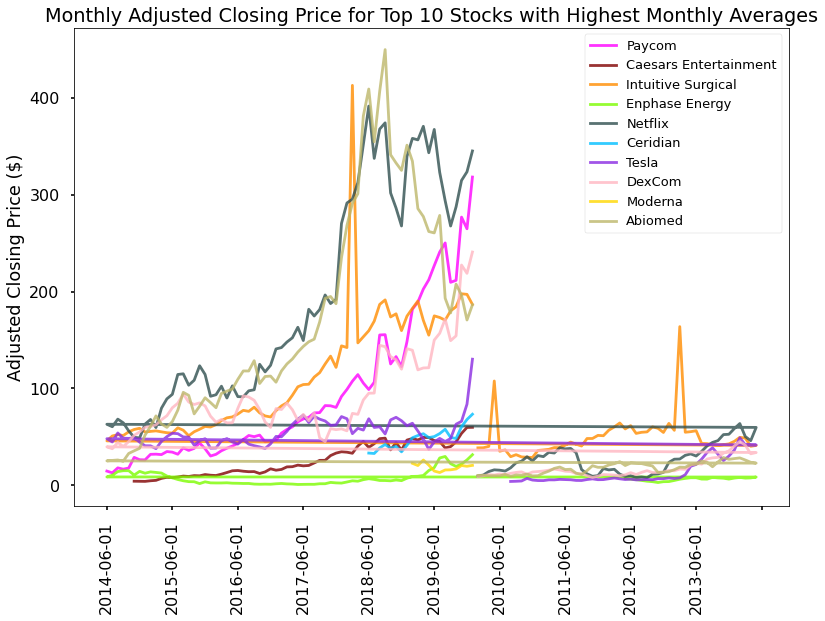

In [6]:
# price data viz
i=0
for comp in (top10.index.values):
    plt.plot(full_DS[full_DS['name'] == comp].date, full_DS[full_DS['name'] == comp].adjclose, label = comp, alpha=.8, color=colorList[i])
    i += 1
    
plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 132, 12),rotation=90)
plt.title('Monthly Adjusted Closing Price for Top 10 Stocks with Highest Monthly Averages')
plt.ylabel('Adjusted Closing Price ($)');

In [7]:
# correlation matrix of top 10 companies
# full_DS.groupby('name')
# corr_df = full_DS.corr(method='pearson')
# sns.heatmap(corr_df, annot=True)
df_corr_subset = full_DS.loc[full_DS['name'].isin(top10.index.values)].reset_index()
df_corr_subset = df_corr_subset[['date','ticker','adjclose']]
df_corr_subset.head()
df_pivot = df_corr_subset.pivot('date','ticker','adjclose').dropna().reset_index()
df_pivot.head()


ticker,date,ABMD,CDAY,CZR,DXCM,ENPH,ISRG,MRNA,NFLX,PAYC,TSLA
0,2019-02-01,334.500000,49.020000,48.209999,139.330002,9.07,182.536667,22.600000,358.100006,181.729996,63.976002
1,2019-03-01,285.589996,51.299999,46.689999,119.099998,9.23,190.193329,20.350000,356.559998,189.130005,55.972000
2,2019-04-01,277.410004,53.150002,49.369999,121.070000,10.04,170.210007,26.030001,370.540009,202.529999,47.737999
3,2019-05-01,261.920013,49.180000,49.169998,121.300003,15.17,154.949997,20.780001,343.279999,212.100006,37.032001
4,2019-06-01,260.489990,50.200001,46.070000,149.839996,18.23,174.850006,14.640000,367.320007,226.720001,44.692001


In [8]:
#just copied code

# imports & formatting
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from   sklearn.model_selection import cross_val_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

finalOutput = pd.read_csv('sharpeDS.csv')
round(finalOutput.describe(),3)

colorList=["black","fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki","darkgoldenrod"]
i=0

x=3
topx = avg_monthly_returns.nlargest(n=x)
top10_names = topx.index
names = set()
for i in top10_names:
  names.add(i)
names







colorList=["black","fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki","darkgoldenrod"]
i=0

p = finalOutput[finalOutput['name'].isin(names)].sort_values[by='date'].groupby(['name','date']).mean().reset_index()
for sec in p.name.unique():
    plt.plot(p[p['name'] == sec].date, p[p['name'] == sec].adjclose, label = sec, alpha=.8)
    i+=1
    
plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 132, 12),rotation=90)
plt.title('Monthly Adjusted Closing Price by Top Earning Companies from 2010 to 2020')
plt.ylabel('Adjusted Closing Price ($)')

SyntaxError: invalid syntax (4195593627.py, line 42)

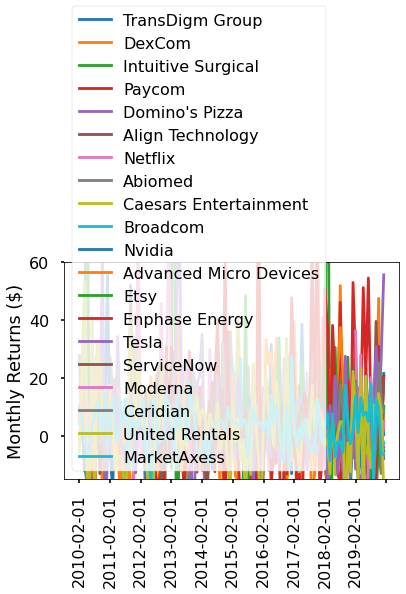

In [9]:
import matplotlib as mpl

%matplotlib inline

# Further data viz - Darren
x=20
topx = avg_monthly_returns.nlargest(n=x)
top10_names = topx.index
names = set()
for i in top10_names:
  names.add(i)
names
top10_fr = full_DS[['name', 'date', 'monthly_return']].loc[full_DS['name'].isin(names)]
top10_monthly_returns = top10_fr.groupby(['name','date'])['monthly_return'].agg(np.mean)


top10_monthly_returns
for name in names:
  plt.plot(top10_monthly_returns[name], label=name)
plt.legend()
plt.ylim((-15,60))

plt.xticks(np.arange(0, 132, 12),rotation=90)

plt.ylabel('Monthly Returns ($)')

COLOR = 'green'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

plt.savefig("vis.png")

In [10]:
# Write Sharpe ratio function - Ben
def negative_sharpe_ratio(periodic_weights, periodic_returns, periodic_riskfree):
  """ 
    periodic_returns - dataframe containing the daily / monthly periodic returns (end of period - start of period) / start of period prices for multiple periods
    periodic_weights - weight vector for multiple periods each weight vector should sum to 1
    periodic_riskfree - risk free ratio
  """
  #print(periodic_returns)
  #print(type(periodic_returns))
  mark_returns = [np.dot(periodic_weights[i], periodic_returns.iloc[i]) for i in range(periodic_returns.size)]

  risk_rate = periodic_riskfree / 100

  er, sd = np.average(mark_returns), np.std(mark_returns)

  monthly_sharpe_ratio = (er - np.average(risk_rate)) / sd
  #print(er, sd, np.average(risk_rate))
  #print(monthly_sharpe_ratio)

  annualized_sharpe_ratio = (8.279)**(1/2) * monthly_sharpe_ratio
  return -1 * monthly_sharpe_ratio#, annualized_sharpe_ratio)



In [11]:
weight = pd.Series([1,1,1,1,1])
returns = pd.Series([1,2,3,4,5])
risk_free = pd.Series([0,0,0,0,0])
negative_sharpe_ratio(weight, returns, risk_free)

-2.1213203435596424

# Model Creation

In [12]:
def constraint(x):
    A= np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b 
    return constraintVal

class MarkowitzModel():
    def __init__(self, num_assets, risk_free):
        self.winit = np.repeat(1.0/num_assets, num_assets)
        self.risk_free = risk_free

    def bounds(self):
        return tuple([(0,1) for x in self.winit])

    def maximize(self, periodic_returns): 
        cons = ({'type': 'eq', 'fun':constraint})
        opt = optimize.minimize(negative_sharpe_ratio, x0 = self.winit, args = \
                                (periodic_returns, self.risk_free), method = 'SLSQP', 
                                 bounds = self.bounds(), constraints = cons, tol = 10**-3)
        return opt.x


In [13]:
#data preprocess. Remove S&P and fill in missing companies
full_DS = full_DS[full_DS['name'] != "S&P 500"]
master_name_list = full_DS[full_DS.date == "2020-01-01"].name
master_name_set = set(master_name_list)

for group_name, df_month in full_DS.groupby(pd.Grouper(key='date')):
  # add any companies that are in the current 500 that arent in the current group
  name_difference = master_name_set.difference(set(df_month.name))
  #if index == 0:
  #  print(name_difference)
  #  print(len(name_difference))

  for xtra in name_difference:
    full_DS = full_DS.append({'name': xtra, 'date': group_name, 'monthly_return': -100}, ignore_index=True)

full_DS = full_DS.sort_values(by = ['date', 'name'])
full_DS['monthly_return'] = full_DS['monthly_return'].fillna(0)
full_DS


,date,open,high,low,close,adjclose,volume,ticker,monthly_return,name,sector,month
32757,2010-02-01,80.839996,81.760002,77.250000,80.150002,58.292374,75020400.0,MMM,-0.422434,3M,Industrials,2.0
4327,2010-02-01,7.093333,7.588333,6.848333,7.550000,6.413709,20010000.0,AOS,6.879643,A. O. Smith,Industrials,2.0
4904,2010-02-01,30.070000,31.799999,29.080000,29.360001,21.523760,108641000.0,ADM,-2.035366,ADM,Consumer Staples,2.0
923,2010-02-01,12.660000,13.180000,11.460000,11.690000,8.911781,155218900.0,AES,-7.442593,AES Corp,Utilities,2.0
4447,2010-02-01,99.470001,105.589996,95.150002,103.639999,86.955826,61784800.0,APA,5.076030,APA Corporation,Energy,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57059,2020-01-01,259.029999,260.399994,238.860001,239.020004,239.020004,8618500.0,ZBRA,-6.428123,Zebra Technologies,Information Technology,1.0
57179,2020-01-01,149.979996,152.429993,145.029999,147.899994,146.060654,18906500.0,ZBH,-1.031770,Zimmer Biomet,Health Care,1.0
57299,2020-01-01,52.360001,52.480000,45.400002,45.490002,42.992527,44266100.0,ZION,-12.384434,Zions Bancorp,Financials,1.0
57382,2020-01-01,132.050003,143.330002,131.479996,134.210007,132.872742,41117200.0,ZTS,1.405395,Zoetis,Health Care,1.0


In [99]:
#full_DS =  full_DS.set_index('date')
model = MarkowitzModel(500, np.zeros(500))
weights = []

index = 0
for group_name, df_month in full_DS.groupby(pd.Grouper(key='date')):
  #if index == 0:
    #print(df_month.monthly_return)

  res = model.maximize(df_month.monthly_return)
  weights.append(res)
  
  print(index)
  index+=1

/var/folders/2v/m85hwzhn4pj_mf2pt28stvkc0000gq/T/ipykernel_57992/4184879369.py:16: RuntimeWarning: invalid value encountered in double_scalars
  monthly_sharpe_ratio = (er - np.average(risk_rate)) / sd


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


In [101]:
np.save('new.npy', weights, allow_pickle=True)
#b = np.load('a.npy', allow_pickle=True)

In [102]:
dates = full_DS['date'].unique()
returns = [np.dot(weights[i], full_DS[full_DS.date == dates[i]]['monthly_return']) for i in range(len(weights))]
print(returns)

[0.0, 2.8797761270780824, 6.310158968150003, 6.771824668107666, 11.27483051273067, 1.7089032110189584, 7.070420611057386, 10.927143408227723, 8.589799039980628, 5.09059200469402, 2.0960299776331537, 6.042748496278885, 2.52404193933158, 2.458886479625505, 1.9802457287606516, 4.825330003455622, 1.594217464114748, 1.3636492286663322, 1.8217796698435305, 2.6413396155327535, 0.6445978860329833, 11.344223615683177, 4.105635165651202, 2.2617497505279003, 8.195617131913428, 5.7176226719931815, 3.873736876148131, 2.244143977577838, 2.2610227071874824, 2.877625744548631, 2.246595742260051, 2.264238466928539, 4.479953228069746, 1.7411059830143591, 2.4271145420597584, 1.8371233049453781, 6.731440465611609, 1.9164441634962965, 3.025704887253297, 2.2975691932471936, 3.3463909459903807, 1.1093394795493374, 5.940826223076733, 1.61660721443062, 5.150386784532835, 5.29525179073252, 2.1231363819165607, 2.021513546352292, 2.362137297678095, 5.197118727087118, 1.6635120586953058, 1.5403101658914753, 1.8658

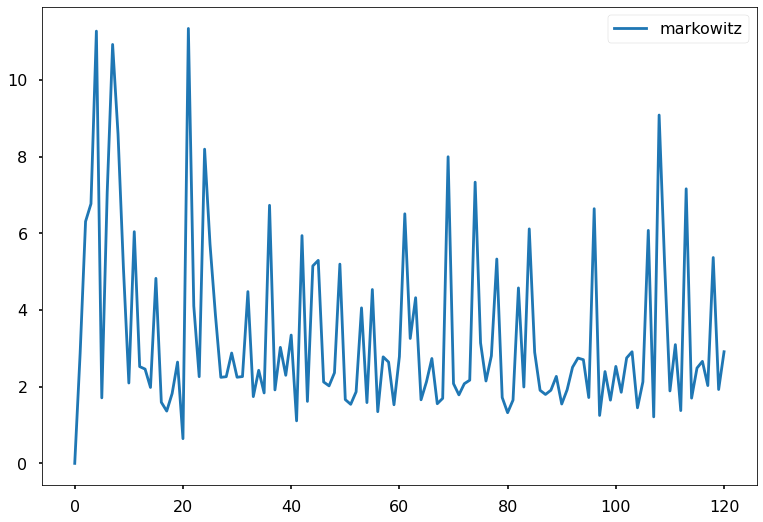

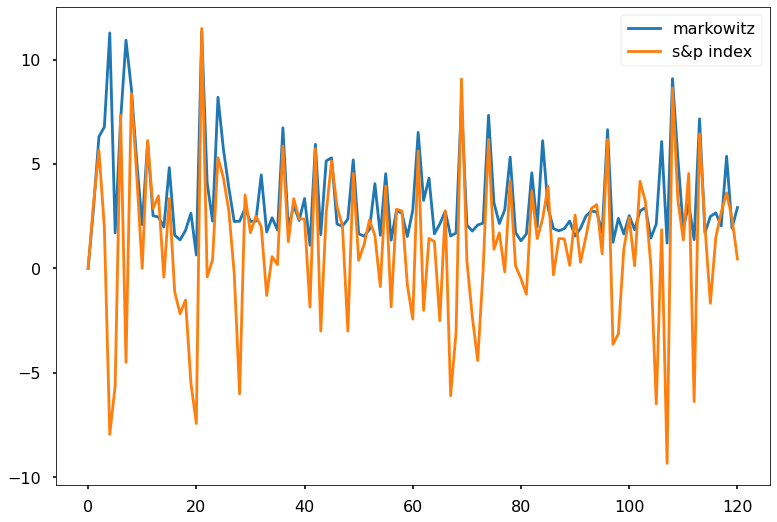

In [112]:
spindex = pd.read_csv("sharpeDS.csv")
spindex = spindex[spindex['name'] == 'S&P 500']
spindex = spindex.drop_duplicates(subset=['date'])
spindex['monthly_return'] = spindex['monthly_return'].fillna(0)
plt.plot(returns, label="markowitz")
plt.plot(spindex['monthly_return'].values, label="s&p index")
plt.legend()
plt.show()


In [115]:
iter = 0
sharpe_avg = 0
for group_name, df_month in full_DS.groupby(pd.Grouper(key='date')):
  #if index == 0:
    #print(df_month.monthly_return)

  sharpe = -1 * negative_sharpe_ratio(weights[iter], df_month.monthly_return,np.zeros(500) )
  sharpe_avg += sharpe
  print(iter, ": ", sharpe)
  iter+=1
  
print("avg sharpe: ", sharpe_avg / iter)

0 :  -0.358703459082237
1 :  0.9027993126177914
2 :  0.09056185081077739
3 :  0.2765033451550224
4 :  0.1792135898917328
5 :  0.38777690809654053
6 :  0.2146561326596999
7 :  0.240091190274703
8 :  0.1492314997264913
9 :  0.13765150160449807
10 :  0.9207925947443382
11 :  0.7537528836404414
12 :  1.0949432857402326
13 :  1.1537323375282529
14 :  1.0601352588925288
15 :  0.16038017831951773
16 :  0.7764120547891352
17 :  0.6195184744043336
18 :  0.5171772113359501
19 :  0.5032935434197677
20 :  0.3599503757399032
21 :  0.45790572747461744
22 :  -0.039134540363582666
23 :  1.1061986463254718
24 :  0.3432364313850461
25 :  0.3270519079444032
26 :  0.05948534308949387
27 :  0.9371579868484352
28 :  0.37789598030602567
29 :  1.2258742405475567
30 :  1.0732875888563953
31 :  1.1603903500924697
32 :  0.013316619095627058
33 :  0.9211474197450363
34 :  1.1364374901000294
35 :  1.2318974870992838
36 :  0.4519876841656782
37 :  1.1555625710823978
38 :  1.7540281800710094
39 :  1.1487867550595097

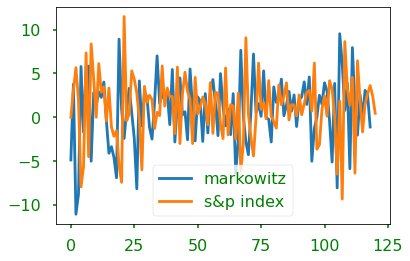

<Figure size 7200x7200 with 0 Axes>

In [30]:

saved_weights = np.load('weights_113.npy', allow_pickle=True)
dates = full_DS['date'].unique()
offset_returns = [np.dot(saved_weights[i], full_DS[full_DS.date == dates[i+1]]['monthly_return']) for i in range(len(dates) - 1)]


spindex = pd.read_csv("sharpeDS.csv")
spindex = spindex[spindex['name'] == 'S&P 500']
spindex = spindex.drop_duplicates(subset=['date'])
spindex['monthly_return'] = spindex['monthly_return'].fillna(0)

plt.plot(offset_returns, label="markowitz")
plt.plot(spindex['monthly_return'].values, label="s&p index")
plt.legend()
plt.show()

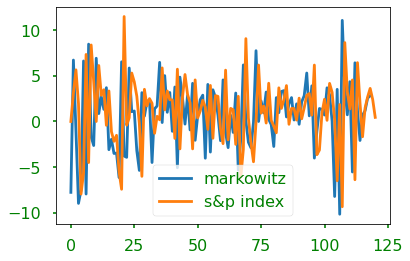

In [26]:

saved_weights = np.load('weights_113.npy', allow_pickle=True)
dates = full_DS['date'].unique()
offset_returns = [np.dot(saved_weights[i], full_DS[full_DS.date == dates[i]]['monthly_return']) for i in range(len(dates) - 1)]


spindex = pd.read_csv("sharpeDS.csv")
spindex = spindex[spindex['name'] == 'S&P 500']
spindex = spindex.drop_duplicates(subset=['date'])
spindex['monthly_return'] = spindex['monthly_return'].fillna(0)

plt.plot(offset_returns, label="markowitz")
plt.plot(spindex['monthly_return'].values, label="s&p index")
plt.legend()
plt.show()